In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SPOTIFY_GREEN = "#1DB954"

In [8]:
metadata = pd.json_normalize(pd.read_json("../../dataset/metadata_genres.json")["results"])

<Axes: title={'center': 'Genres (total: 6065 songs)'}, xlabel='top_genre'>

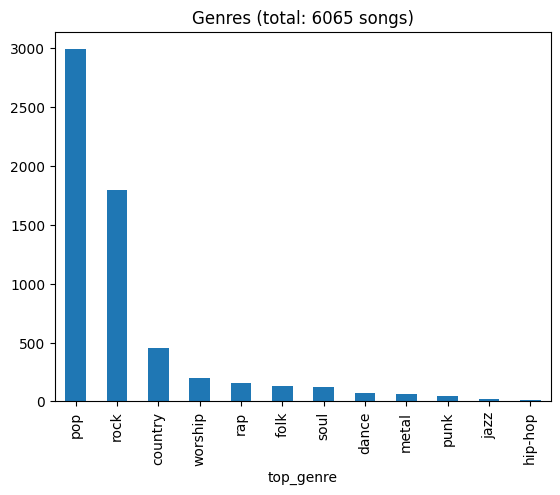

In [15]:
buckets = {
            "worship": ["worship", "christian", "gospel"],
            "folk": ["folk"],
            "dance": ["dance", "disco"],
            "metal": ["metal"],
            "jazz": ["jazz"],
            "country": ["country"],
            "rap": ["rap", "trap"],
            "punk": ["punk"],
            "soul": ["soul"],
            "hip-hop": ["hiphop", "hip-hop", "hip hop"],
            "rock": ["rock", "mellow gold", "grunge", "beatlesque"],
            "pop": ["pop", "new romantic", "adult standards", "new wave", "permanent wave", "urban contemporary"],
            }

def normalize_genre(genres):
    flattened_list = set([])
    for genre in genres:
        didBucket = False
        for bucket, keys in buckets.items():
            for k in keys:
                if k in genre:
                    flattened_list.add(bucket)
                    didBucket = True
                    break
            if didBucket: break
        if not didBucket:
            # flattened_list.add("other")
            pass
                
    return list(flattened_list)

metadata["new_genres"] = metadata["genres"].apply(lambda x: normalize_genre(x))
metadata = metadata[metadata["new_genres"].apply(lambda x: len(x) > 0)]

top_ten = pd.DataFrame(np.concatenate(metadata["new_genres"].tolist()).ravel().tolist())
top_ten_keys = [k for k, v in sorted({k[0]: c for k, c in top_ten.value_counts().items()}.items(), key=lambda x: -x[1])]

def get_top_genre(genres):
    for t in top_ten_keys:
        if t in genres:
            return t

metadata["top_genre"] = metadata["new_genres"].apply(lambda x: get_top_genre(x))
metadata["top_genre"].value_counts().plot.bar(title=f"Genres (total: {len(metadata)} songs)")

<Axes: title={'center': 'Popularity of Top Genres'}, xlabel='Top Genre', ylabel='Average Popularity %'>

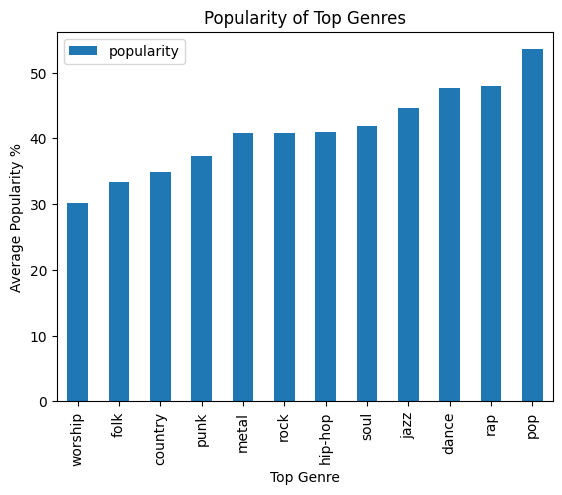

In [16]:
popularity = metadata.groupby(by="top_genre").mean(numeric_only=True).sort_values(by="popularity")
popularity.plot.bar(xlabel="Top Genre", ylabel="Average Popularity %", title="Popularity of Top Genres")

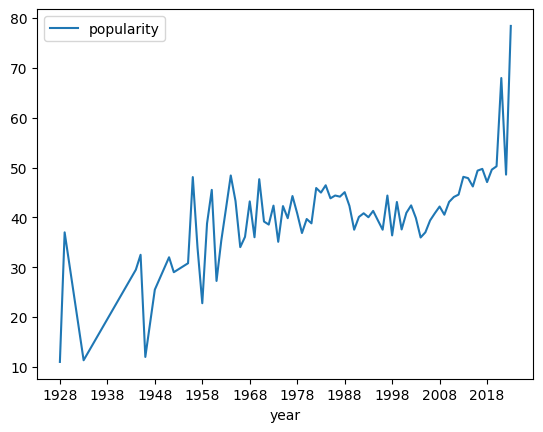

In [18]:
metadata["year"] = pd.to_datetime(metadata["release_date"], format='mixed').dt.year
metadata.groupby(by="year").mean(numeric_only=True).plot()
ticks = plt.xticks(ticks=range(metadata["year"].min(), metadata["year"].max(), 10))

In [19]:
def clean_hyperlink(df):
    rm = '=hyperlink("C:\\Users\\rpilo\\Downloads\\orpheus\\dataset\\output\\coref_CoreNLP_minified_corpus\\coref\\'
    df["song_path"] = df["Document"].apply(lambda p: p[len(rm):-2])
    

In [35]:
svo_coref_gender = pd.read_csv("../../dataset/output/SVO_coref_CoreNLP_minified_corpus/gender/NLP_SVO_CoreNLP_gender_Dir_coref.csv")
svo_coref_gender

,Subject (S),S Gender,Verb (V),Object (O),O Gender,Sentence ID,Sentence,Document ID,Document
0,you,NaN,hear,Fernando,NaN,1,Can you hear the drums Fernando?,1,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
1,They,NaN,recall,NaN,NaN,3,Do They still recall the frightful night They ...,1,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
2,They,NaN,crossed,Grande,NaN,3,Do They still recall the frightful night They ...,1,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
3,me,NaN,'m,marionette,NaN,2,"me 'm a marionette, just a marionette Pull the...",2,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
4,marionette,NaN,Pull,string,NaN,2,"me 'm a marionette, just a marionette Pull the...",2,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
...,...,...,...,...,...,...,...,...,...
60321,I,NaN,held,your,NaN,1,I do n't know when we fell apart The love that...,6500,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
60322,we,NaN,turns,NaN,NaN,1,I do n't know when we fell apart The love that...,6500,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
60323,said,NaN,turns,NaN,NaN,1,I do n't know when we fell apart The love that...,6500,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."
60324,I,NaN,'s,pride,NaN,1,I do n't know when we fell apart The love that...,6500,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d..."


In [42]:
svo_coref_gender = svo_coref_gender.dropna()
clean_hyperlink(svo_coref_gender)
svo_coref_gender

,Subject (S),S Gender,Verb (V),Object (O),O Gender,Sentence ID,Sentence,Document ID,Document,song_path
986,Jesus,MALE,cry,Jesus,MALE,3,When Jesus lived here on this earth Jesus knew...,139,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Alison_Krauss_Everybody_Wants_To_Go_To_Heaven.txt
2021,George,MALE,calls,George,MALE,2,Everyone is wearing big smiles Everyone all tr...,262,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Arrogant_Worms_The_Christmas_Song.txt
2749,He,MALE,save,He,MALE,9,"He was trying to save He 's job He was, He was...",334,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Beautiful_South_36D.txt
3213,Romeo,MALE,loved,Juliet,FEMALE,15,Romeo loved Juliet.,374,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Bette_Midler_Fever.txt
3655,him,MALE,say,him,MALE,20,him 'll say him just wants to be friends.,385,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Bette_Midler_Married_Men.txt
...,...,...,...,...,...,...,...,...,...,...
59856,He,MALE,is,God,MALE,24,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt
59858,He,MALE,is,God,MALE,26,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt
59860,He,MALE,is,God,MALE,28,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt
59862,He,MALE,is,God,MALE,30,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt


In [21]:
df = svo_coref_gender.merge(metadata, left_on="song_path", right_on="song_path")

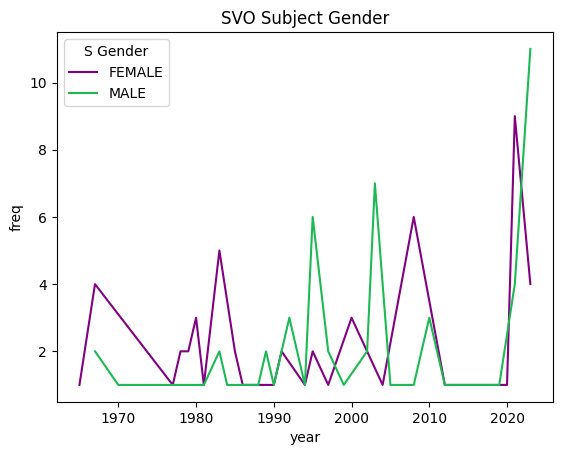

In [22]:
v = list(df.groupby(by="year")["S Gender"].value_counts().items())

k = [_keys[1] for _keys, _y in v]
x = [_keys[0] for _keys, _y in v]
y = [_y for _keys, _y in v]
rows = [[_k, _x, _y] for _k, _x, _y in zip(k, x, y)]
rows

gender_year = pd.DataFrame(rows, columns=["S Gender", "year", "freq"])
g = sns.lineplot(
    data=gender_year,
    x = "year",
    y = "freq",
    hue="S Gender",
    palette={"MALE": SPOTIFY_GREEN, "FEMALE": "purple"})

_ = g.set_title("SVO Subject Gender")

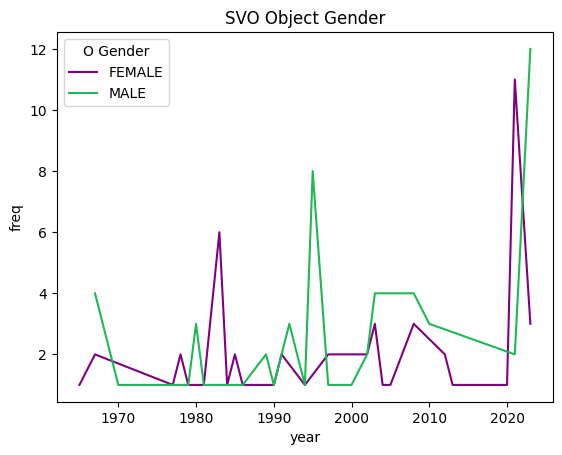

In [23]:
v2 = list(df.groupby(by="year")["O Gender"].value_counts().items())

k2 = [_keys[1] for _keys, _y in v2]
x2 = [_keys[0] for _keys, _y in v2]
y2 = [_y for _keys, _y in v2]
rows2 = [[_k, _x, _y] for _k, _x, _y in zip(k2, x2, y2)]

gender_year2 = pd.DataFrame(rows2, columns=["O Gender", "year", "freq"])
g2 = sns.lineplot(
    data=gender_year2,
    x = "year",
    y = "freq",
    hue="O Gender",
    palette={"MALE": SPOTIFY_GREEN, "FEMALE": "purple"})
_ = g2.set_title("SVO Object Gender")

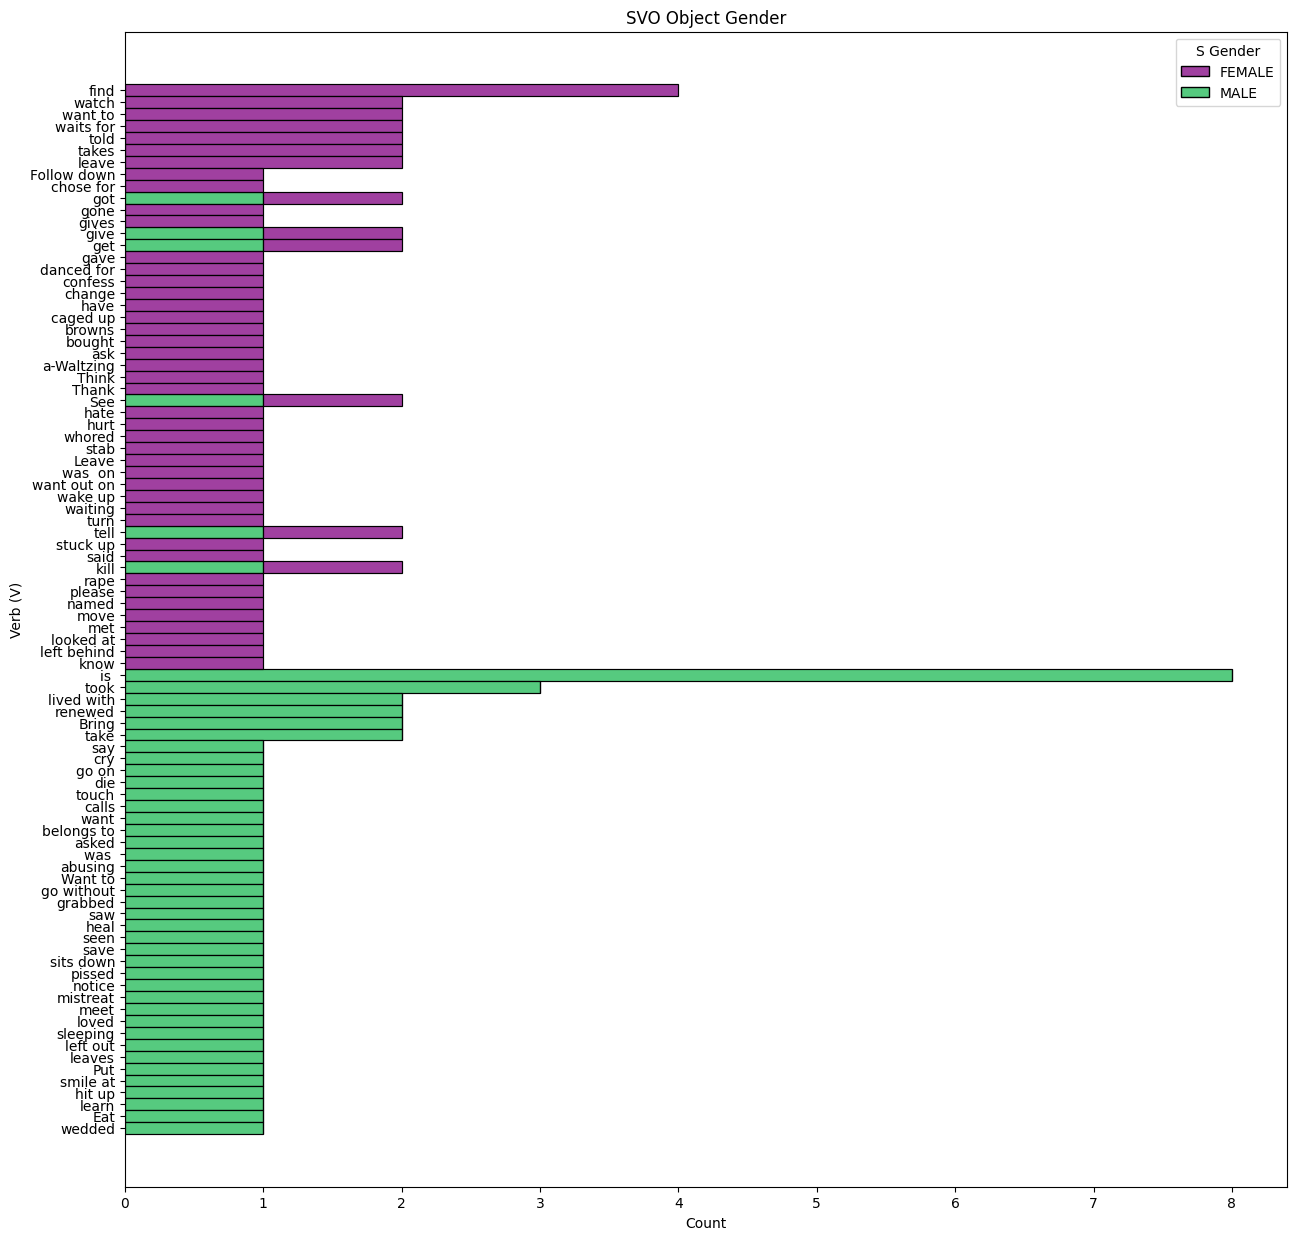

In [24]:
v3 = list(df.groupby(by="S Gender")["Verb (V)"].value_counts().items())
k3 = [_keys[0] for _keys, _y in v3]
x3 = [_keys[1] for _keys, _y in v3]
y3 = [_y for _keys, _y in v3]
rows3 = [[_k, _x, _y] for _k, _x, _y in zip(k3, x3, y3) if _y > 0]

fig, ax = plt.subplots(figsize=(15, 15))
gender_verbs = pd.DataFrame(rows3, columns=["S Gender", "Verb (V)", "freq"])
g3 = sns.histplot(
    ax=ax,
    data=gender_verbs,
    y = "Verb (V)",
    weights = "freq",
    multiple="stack",
    hue="S Gender",
    palette={"MALE": SPOTIFY_GREEN, "FEMALE": "purple"})

_ = g3.set_title("SVO Object Gender")

<Axes: title={'center': 'SVO Object Gender'}, xlabel='Count', ylabel='Verb (V)'>

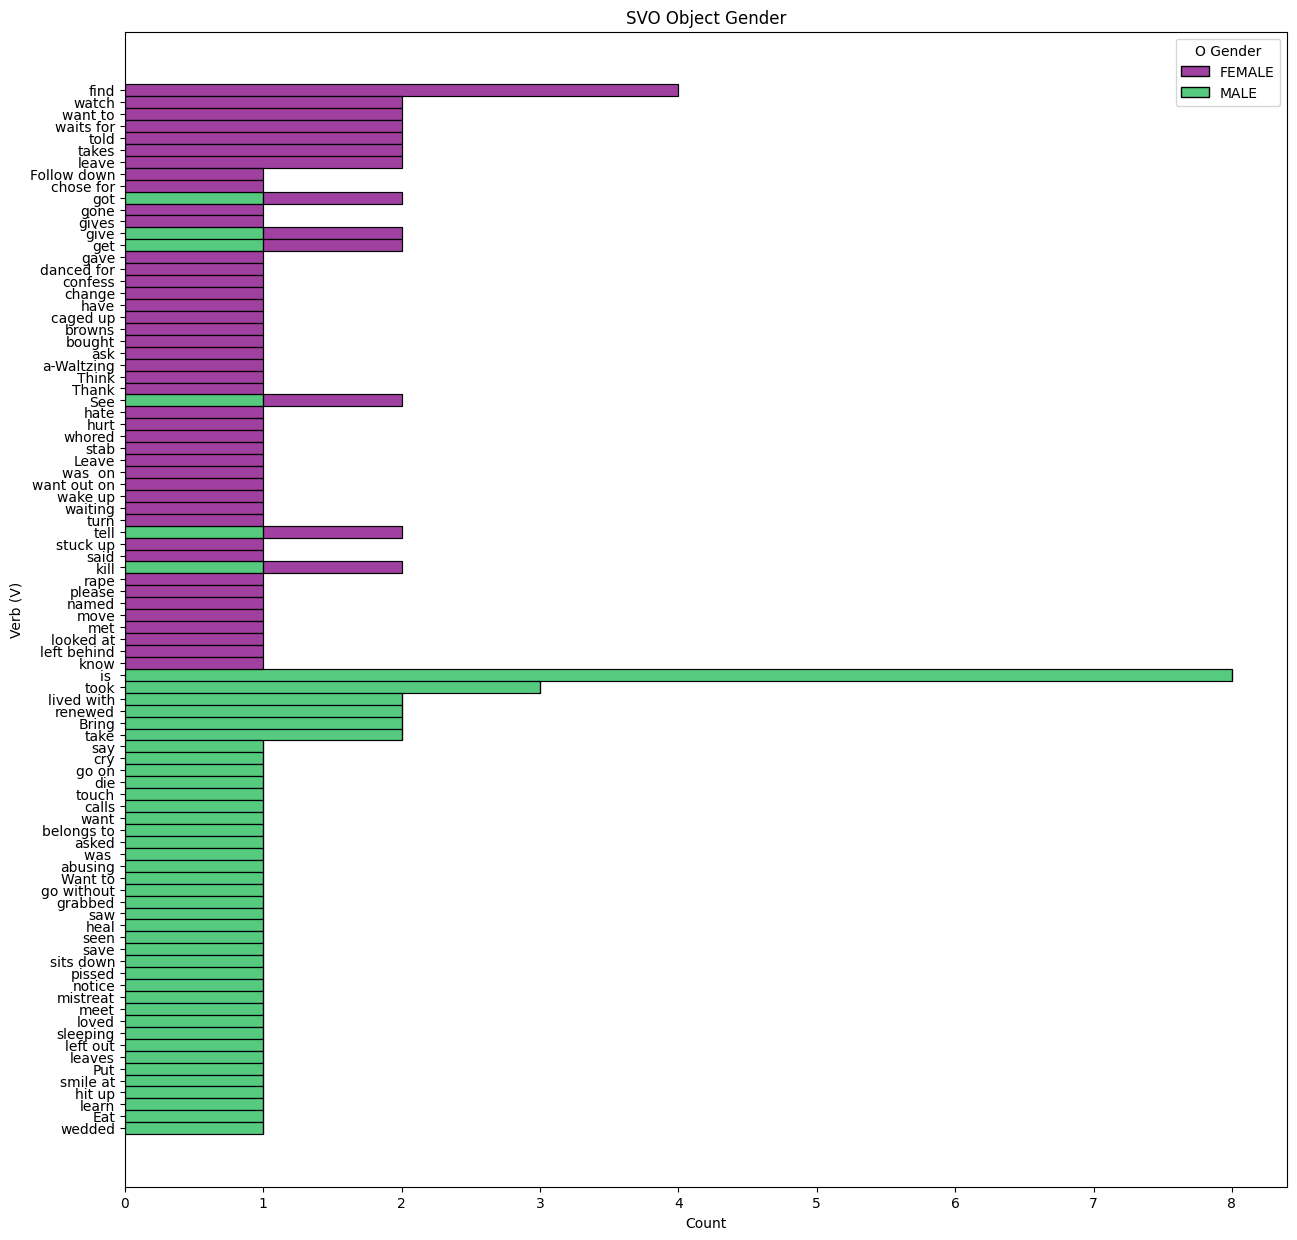

In [25]:
v4 = list(df.groupby(by="O Gender")["Verb (V)"].value_counts().items())
k4 = [_keys[0] for _keys, _y in v4]
x4 = [_keys[1] for _keys, _y in v4]
y4 = [_y for _keys, _y in v4]
rows4 = [[_k, _x, _y] for _k, _x, _y in zip(k4, x4, y4) if _y > 0]

fig, ax = plt.subplots(figsize=(15, 15))
gender_verbs2 = pd.DataFrame(rows3, columns=["O Gender", "Verb (V)", "freq"])
g4 = sns.histplot(
    ax=ax,
    data=gender_verbs2,
    y = "Verb (V)",
    weights = "freq",
    multiple="stack",
    hue="O Gender",
    palette={"MALE": SPOTIFY_GREEN, "FEMALE": "purple"})

_ = g4.set_title("SVO Object Gender")
g4

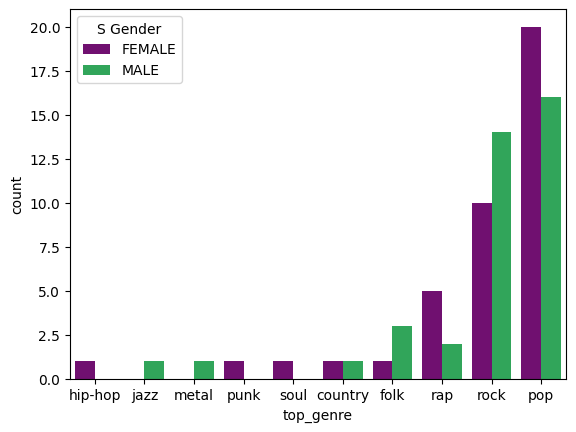

In [198]:
# find genres with most gender references after only including unique document ids
unique_tracks = df.drop_duplicates(subset=['Document ID'])
gender_by_genre = unique_tracks.groupby(by=['top_genre'], as_index=False)[['S Gender']].value_counts()

genre_ordered = gender_by_genre.groupby(by='top_genre').agg('sum').sort_values(by="count", ascending=True).index

ax = sns.barplot(gender_by_genre, x='top_genre', y='count', hue='S Gender', order=genre_ordered, palette={"MALE": SPOTIFY_GREEN, "FEMALE": "purple"})
sns.move_legend(ax, "upper left")

In [54]:
df

,Subject (S),S Gender,Verb (V),Object (O),O Gender,Sentence ID,Sentence,Document ID,Document,song_path,id,artists,popularity,release_date,genres,new_genres,top_genre,year
0,Jesus,MALE,cry,Jesus,MALE,3,When Jesus lived here on this earth Jesus knew...,139,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Alison_Krauss_Everybody_Wants_To_Go_To_Heaven.txt,10QMlZCdMJHpSdtv9ye54G,"[Alison Krauss, The Cox Family]",23,1994-01-28,"[bluegrass, folk, progressive bluegrass]",[folk],folk,1994
1,George,MALE,calls,George,MALE,2,Everyone is wearing big smiles Everyone all tr...,262,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Arrogant_Worms_The_Christmas_Song.txt,3P1XquMwzDGCo2VptzbwD1,[Arrogant Worms],5,1992-10-12,"[comic, geek folk, kingston on indie]",[folk],folk,1992
2,He,MALE,save,He,MALE,9,"He was trying to save He 's job He was, He was...",334,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Beautiful_South_36D.txt,1jVZjhRf9eemGjfA8A0bNn,[The Beautiful South],24,1992-01-01,"[britpop, melancholia, new wave pop, sophisti-...",[pop],pop,1992
3,Romeo,MALE,loved,Juliet,FEMALE,15,Romeo loved Juliet.,374,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Bette_Midler_Fever.txt,2Pxqs0WmxxHTV5QaTdmt3Q,[Bette Midler],63,1988,"[adult standards, new wave pop, soft rock]","[pop, rock]",pop,1988
4,him,MALE,say,him,MALE,20,him 'll say him just wants to be friends.,385,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Bette_Midler_Married_Men.txt,5iUzEn2QzBW0KEWNQO1KQC,[Bette Midler],46,2008-01-09,"[adult standards, new wave pop, soft rock]","[pop, rock]",pop,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,He,MALE,is,God,MALE,24,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt,0f0SbtoKGe41cX5LzlnX6X,[TOMORROW X TOGETHER],81,2023-01-27,"[k-pop, k-pop boy group]",[pop],pop,2023
112,He,MALE,is,God,MALE,26,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt,0f0SbtoKGe41cX5LzlnX6X,[TOMORROW X TOGETHER],81,2023-01-27,"[k-pop, k-pop boy group]",[pop],pop,2023
113,He,MALE,is,God,MALE,28,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt,0f0SbtoKGe41cX5LzlnX6X,[TOMORROW X TOGETHER],81,2023-01-27,"[k-pop, k-pop boy group]",[pop],pop,2023
114,He,MALE,is,God,MALE,30,He is God.,6446,"=hyperlink(""C:\Users\rpilo\Downloads\orpheus\d...",Zao_Growing_In_Grace.txt,0f0SbtoKGe41cX5LzlnX6X,[TOMORROW X TOGETHER],81,2023-01-27,"[k-pop, k-pop boy group]",[pop],pop,2023


In [50]:
df.groupby(by=["top_genre", "S Gender" ])['Verb (V)'].value_counts()

top_genre  S Gender  Verb (V)   
country    FEMALE    have           1
           MALE      got            1
folk       FEMALE    whored         1
           MALE      sits down      1
                     cry            1
                                   ..
rock       MALE      die            1
                     belongs to     1
                     asked          1
                     Want to        1
soul       FEMALE    left behind    1
Name: count, Length: 97, dtype: int64